In [2]:
# TO DO: Clasical stats, neximport cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pathlib import Path
import re
import cv2


In [6]:
def extract_features(img):
    """Extract features optimized for MAGIC telescope mirror images."""
    features = {}
    h, w = img.shape[:2]
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # ── Mask out central camera housing ──
    mask = np.ones((h, w), dtype=np.uint8) * 255
    cam_y, cam_x = int(h * 0.38), int(w * 0.52)
    cv2.circle(mask, (cam_x, cam_y), int(min(h,w)*0.12), 0, -1)

    valid = gray[mask > 0]

    features['mean_brightness'] = np.mean(valid)
    features['std_brightness'] = np.std(valid)

    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    features['sharpness'] = np.std(laplacian)
    return features

def get_warm_bright(image):
    img = image[0:800, :]
    w, h = img.shape[0], img.shape[1]
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # Warm bright pixels (sun/flare signature)
    hue = hsv[:,:,0].astype(float)
    sat = hsv[:,:,1].astype(float)
    val = hsv[:,:,2].astype(float)

    # Lens flare is typically warm (H < 30 or H > 160 in OpenCV) AND bright AND saturated
    warm_bright = ((hue < 25) | (hue > 160)) & (val > 180) & (sat > 60)
    return (np.sum(warm_bright)/(w*h))*100

In [4]:
img_dir = Path("/home/pgliwny/Praca/Computer_vision_for_MAGIC/data/data/2025/12/22")
files = sorted(img_dir.glob("IRCamM1T*.jpg"))

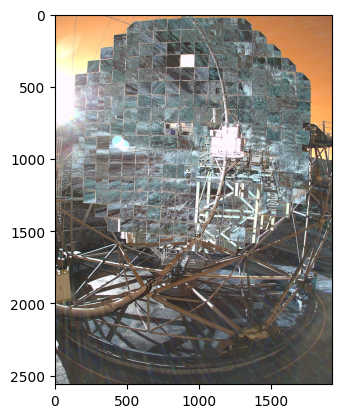

{'mean_brightness': np.float64(114.29746592486698), 'std_brightness': np.float64(55.74074385033076), 'sharpness': np.float64(35.38724409417306)}
0.024609375


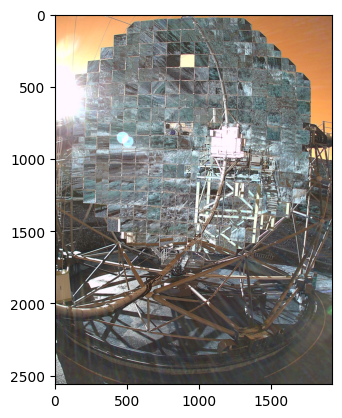

{'mean_brightness': np.float64(115.03308639666827), 'std_brightness': np.float64(56.64156734337002), 'sharpness': np.float64(35.01614353925767)}
0.007161458333333333


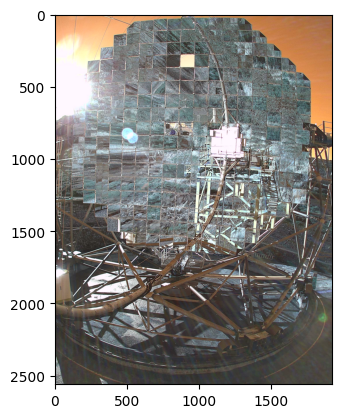

{'mean_brightness': np.float64(112.4465112694465), 'std_brightness': np.float64(56.69268446576932), 'sharpness': np.float64(34.24301114440646)}
0.004622395833333333


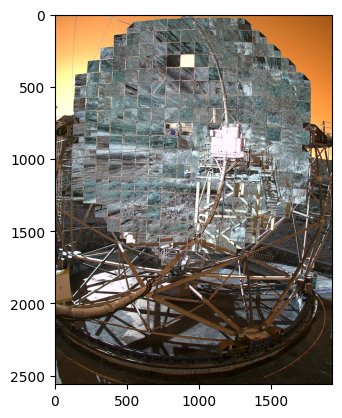

{'mean_brightness': np.float64(97.51242569211017), 'std_brightness': np.float64(63.71184493771304), 'sharpness': np.float64(38.52573743701278)}
0.015885416666666666


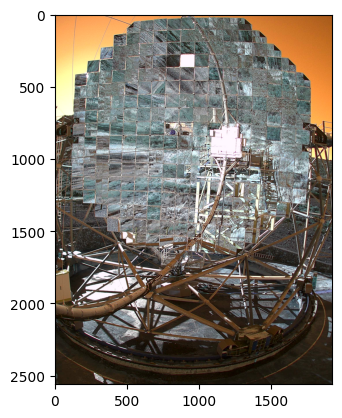

{'mean_brightness': np.float64(100.8930928696222), 'std_brightness': np.float64(64.8155639836988), 'sharpness': np.float64(38.7732436943866)}
0.016731770833333333


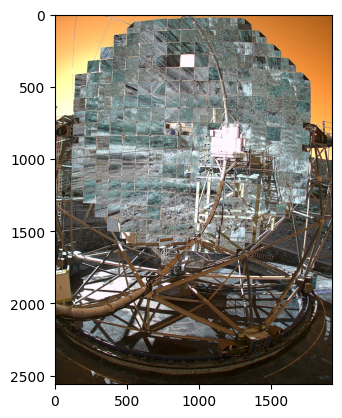

{'mean_brightness': np.float64(103.42891805859392), 'std_brightness': np.float64(65.18239012021635), 'sharpness': np.float64(38.62741769048892)}
0.009049479166666666


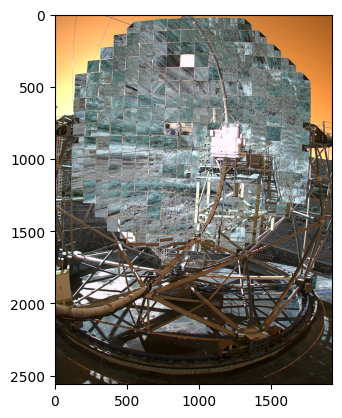

{'mean_brightness': np.float64(101.0272209401955), 'std_brightness': np.float64(64.26336705097962), 'sharpness': np.float64(37.524817155242594)}
0.029557291666666666


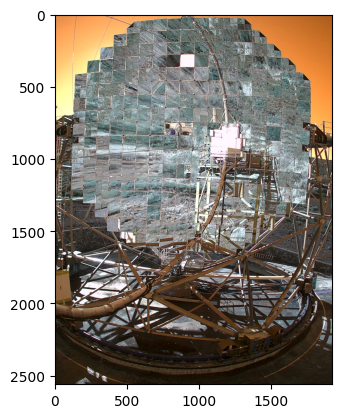

{'mean_brightness': np.float64(101.99489786356723), 'std_brightness': np.float64(64.58418915186928), 'sharpness': np.float64(37.458197137554)}
0.0048177083333333336


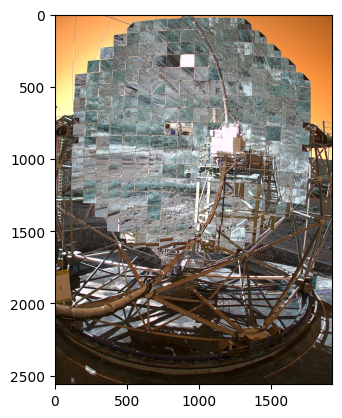

{'mean_brightness': np.float64(103.28134039420164), 'std_brightness': np.float64(64.69249495535462), 'sharpness': np.float64(37.21459011790623)}
0.006315104166666667


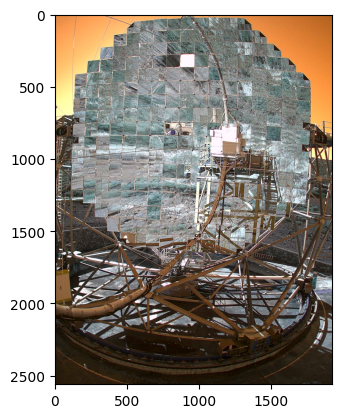

{'mean_brightness': np.float64(104.21431794669647), 'std_brightness': np.float64(64.7227995566343), 'sharpness': np.float64(36.911760710804685)}
0.006966145833333333


In [8]:
for f in files[15:25]:
    img = cv2.imread(str(f))
    plt.figure()
    plt.imshow(img)
    plt.show()
    feat = extract_features(img)
    w = get_warm_bright(img)
    print(feat)
    print(w)